# Part I - Pupil level of study relationship to family stability
## by ALI TRABELSI KAROUI

## Introduction
> The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems. For most countries, the sample is around 5,000 students, but in some countries the number is even higher. In total, the PISA 2012 dataset contains data on 485 490 pupils.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

> The main table is student2012. Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: PV1MATH-PV5MATH (for math), PV1READ-PV5READ (for reading) and PV1SCIE-PV5SCIE (for science). For given area all five values PV1- PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1.



## Preliminary Wrangling


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### the structure of the dataset

> There are 271874 observations for students in the dataset with 16 columns summerising the characteristics of (Kind of Country(OECD), International Grade, Gender, Truancy - Late for School, Truancy - Skip whole school day, Mother<Highest Schooling>, Mother Current Job Status, Father<Highest Schooling>, and Father Current Job Status). Most variables are qualitative in nature, but the variables variables math scores, reading scores, sciences scores, age, wealth, effort, tot_min and final scores are numeric. <br>

####  the levels for the qualitative variables are as follow: <br>
 - OECD : OECD, Non-OECD <br>
 - Gender : Male, Female<br>
 - Late: One or two times, None, Three or four times, Five or more times <br>
 - skip: None, One or two times, Three or four times, Five or more times <br>
 - mother_degree : <ISCED level 3A>, <ISCED level 3B, 3C>, <ISCED level 2>, She did not complete <ISCED level 1> , <ISCED level 1> <br>
 - Mother_job : Working full-time <for pay>, Not working, but looking for a job , Other (e.g. home duties, retired), Working part-time <for pay> <br>
 - Father_degree : <ISCED level 3A>, <ISCED level 3B, 3C>, <ISCED level 2>, She did not complete <ISCED level 1> , <ISCED level 1> <br>
 - Father_job : Working full-time <for pay>, Not working, but looking for a job , Other (e.g. home duties, retired), Working part-time <for pay> <br>

### What is/are the main feature(s) of interest in your dataset?

> I am interested in analyzing the most important lifestyles and characteristics to have better grades in scienec, reading and science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will look first for the distribution of final grades between classes of countries.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


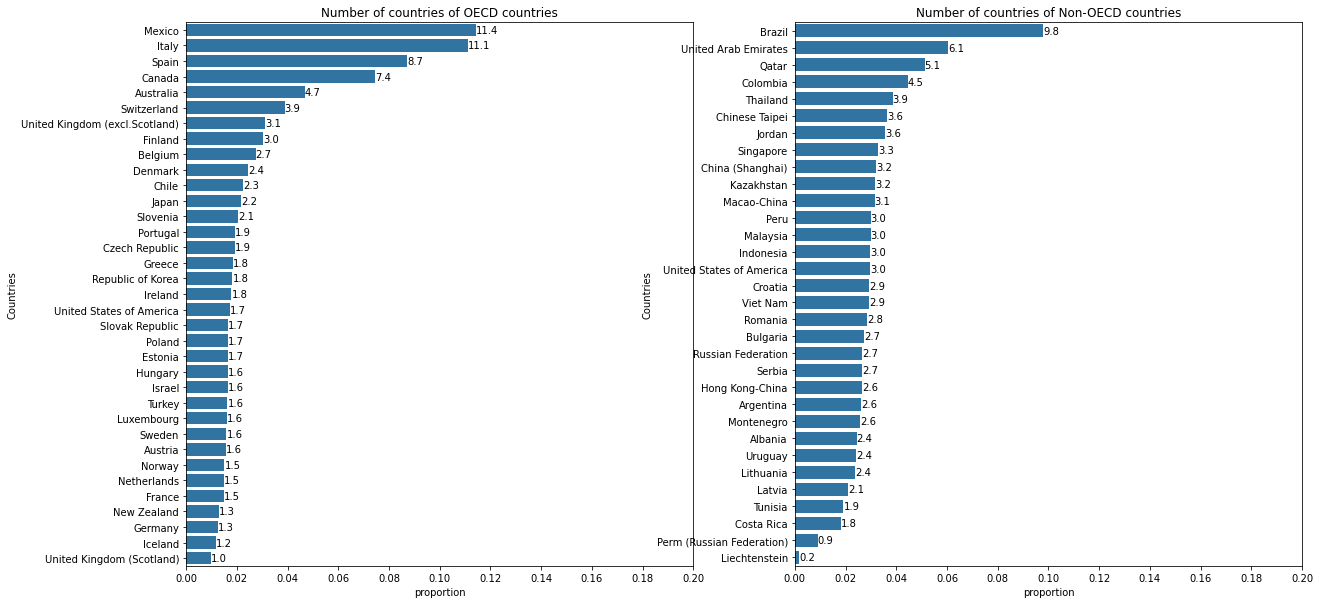

The observatins inside each category of countries differ from one country to another. United kingdoms presents more than 4% because it has the observation with scotland and without scotland. For non-OECD countries, Brazil has the highest proportion of the total distribution, which is better than other wealthy countries like China or Croatia 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [34]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts
for_counts = percentage_blocks(pisa_final, 'OECD')

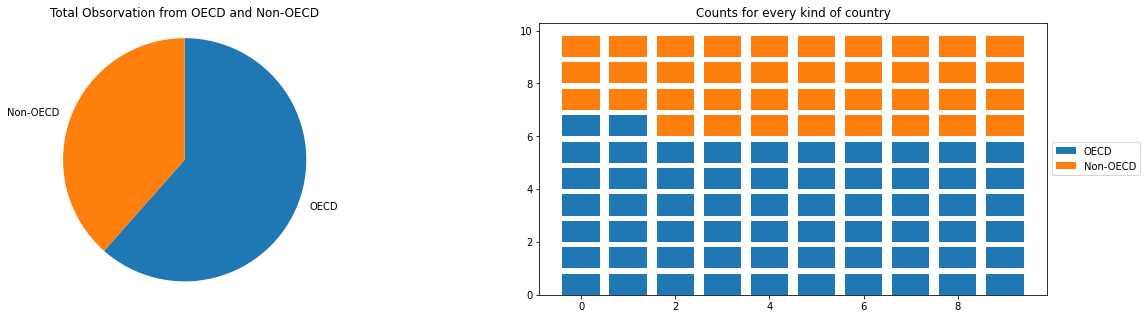

In [35]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 1) 
sorted_counts = pisa_final['OECD'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Total Obsorvation from OECD and Non-OECD')

plt.subplot(1, 2, 2) 
prev_count = 0
for cat in range(for_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + for_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += for_counts[cat]
plt.legend(for_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.title('Counts for every kind of country');

The share of the non-OECD countries is smaller than the share of OECD countries which is logical according to the easier ways to collect information in the wealthy countries or developped countries. 

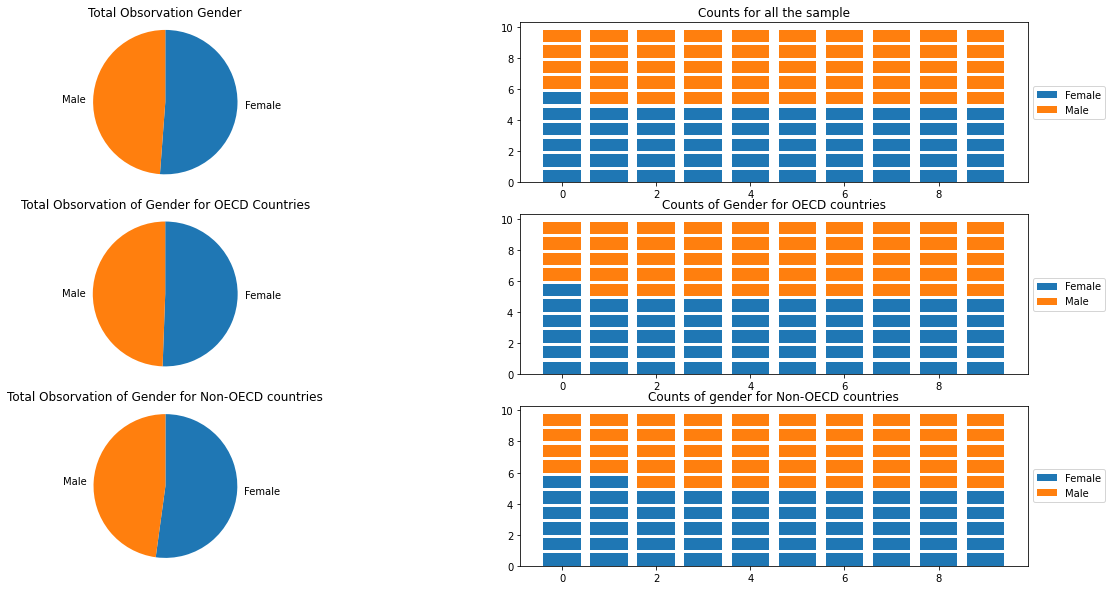

The distribution of gender in the sample is equal in total, which leads to more accurate analysis and fair results for both genders. Whereas the observations for the OECD countries hold equal number of Males and Females, non-OECD members have less equilibriate share from the both genders, with Females presents a higher share. 

In [37]:
def prop_tick(df, col):
    freq = df[col].value_counts()
    gen_order = freq.index
    n_nc = df[col].value_counts().sum()
    max_type_count = freq[0]
    max_prop = max_type_count / n_nc
    tick_props = np.arange(0, max_prop + 0.12, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    plt.xticks(tick_props * n_nc, tick_names)
    return {'tnames' : tick_names, 'trops' : tick_props, 'numb' : n_nc, 'gorder' : gen_order}

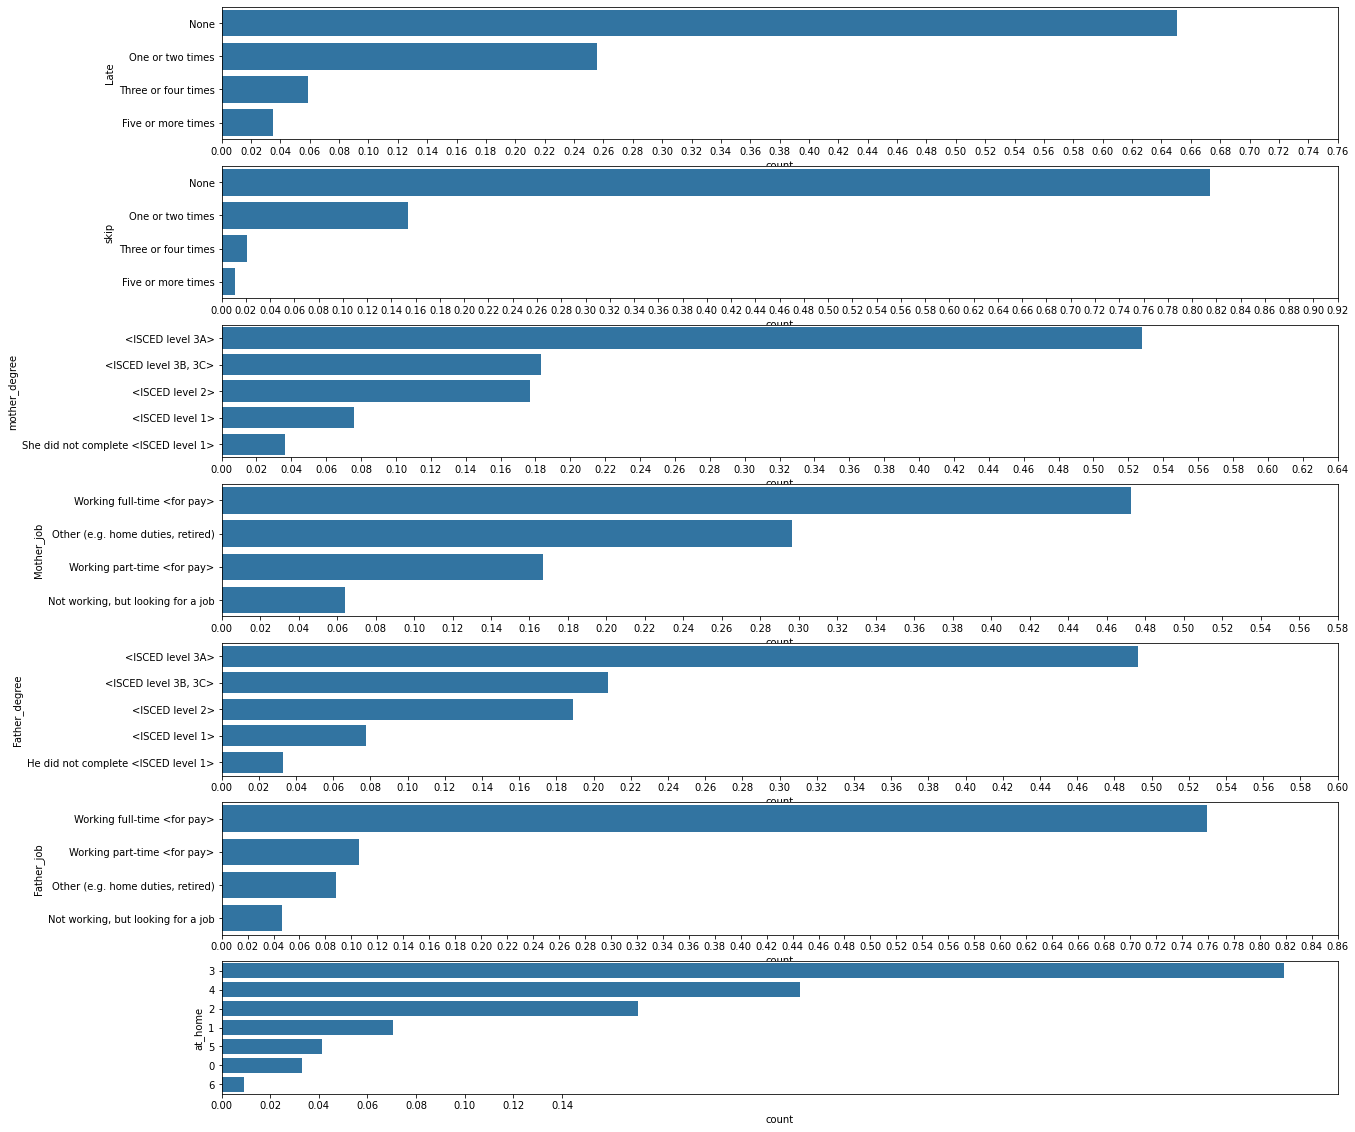

In [38]:

plt.figure(figsize = [20, 20]) 


default_color = sb.color_palette()[0]
plt.subplot(7, 1, 1) 
sb.countplot(data=pisa_final, y='Late', color=default_color, order=prop_tick(pisa_final, "Late")['gorder'])
plt.xticks(prop_tick(pisa_final, "Late")['trops'] * prop_tick(pisa_final, "Late")['numb'], prop_tick(pisa_final, "Late")['tnames'])
plt.subplot(7, 1, 2) 
sb.countplot(data=pisa_final, y='skip', color=default_color, order=prop_tick(pisa_final, "skip")['gorder'])
plt.xticks(prop_tick(pisa_final, "skip")['trops'] * prop_tick(pisa_final, "skip")['numb'], prop_tick(pisa_final, "skip")['tnames'])
plt.subplot(7, 1, 3) 
sb.countplot(data=pisa_final, y='mother_degree', color=default_color, order=prop_tick(pisa_final, "mother_degree")['gorder'])
plt.xticks(prop_tick(pisa_final, "mother_degree")['trops'] * prop_tick(pisa_final, "mother_degree")['numb'], prop_tick(pisa_final, "mother_degree")['tnames'])
plt.subplot(7, 1, 4) 
sb.countplot(data=pisa_final, y='Mother_job', color=default_color, order=prop_tick(pisa_final, "Mother_job")['gorder'])
plt.xticks(prop_tick(pisa_final, "Mother_job")['trops'] * prop_tick(pisa_final, "Mother_job")['numb'], prop_tick(pisa_final, "Mother_job")['tnames'])
plt.subplot(7, 1, 5) 
sb.countplot(data=pisa_final, y='Father_degree', color=default_color, order=prop_tick(pisa_final, "Father_degree")['gorder'])
plt.xticks(prop_tick(pisa_final, "Father_degree")['trops'] * prop_tick(pisa_final, "Father_degree")['numb'], prop_tick(pisa_final, "Father_degree")['tnames'])
plt.subplot(7, 1, 6) 
sb.countplot(data=pisa_final, y='Father_job', color=default_color, order=prop_tick(pisa_final, "Father_job")['gorder'])
plt.xticks(prop_tick(pisa_final, "Father_job")['trops'] * prop_tick(pisa_final, "Father_job")['numb'], prop_tick(pisa_final, "Father_job")['tnames'])
plt.subplot(7, 1, 7) 
sb.countplot(data=pisa_final, y='at_home', color=default_color, order=prop_tick(pisa_final, "at_home")['gorder'])
plt.xticks(prop_tick(pisa_final, "at_home")['trops'] * prop_tick(pisa_final, "at_home")['numb'], prop_tick(pisa_final, "at_home")['tnames']);



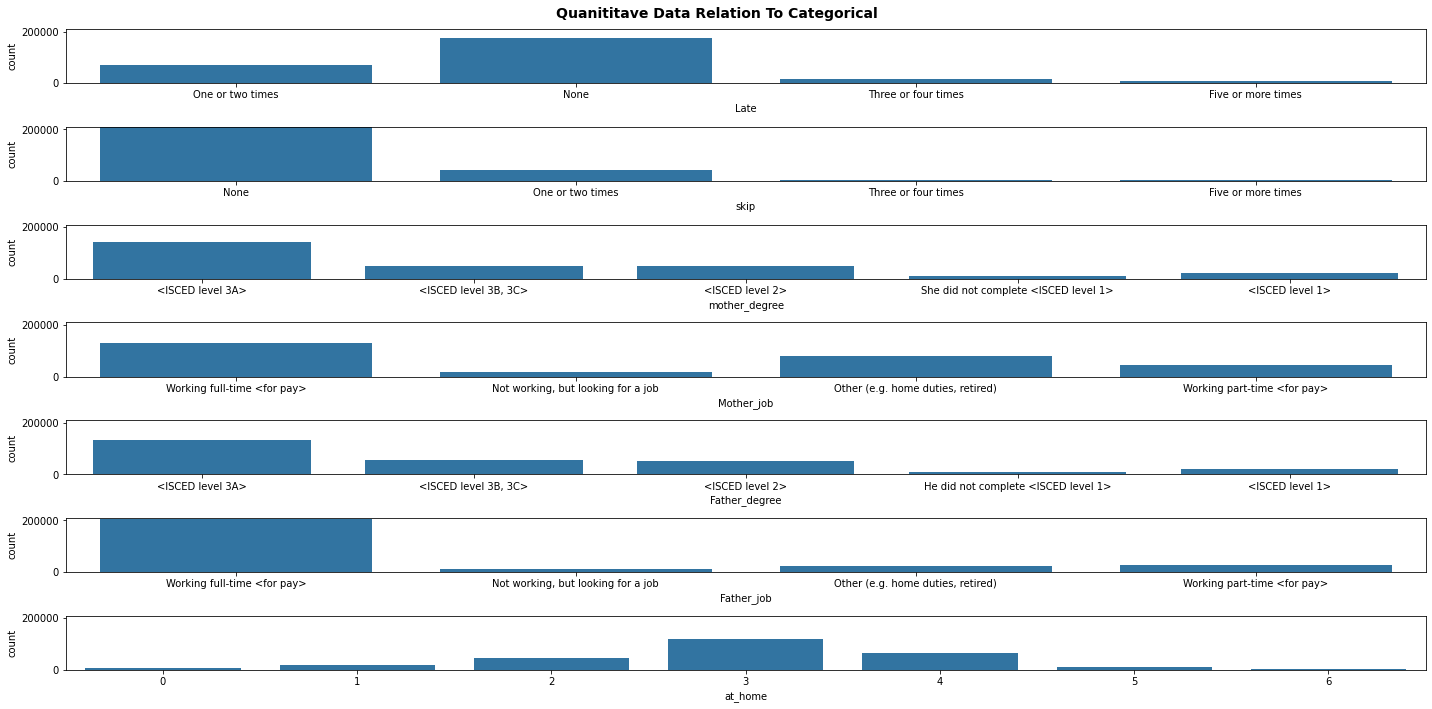

In [40]:

fig, ax = plt.subplots(nrows=7, figsize = [20,10])

default_color = sb.color_palette()[0]
sb.countplot(data = pisa_final, x = 'Late', color = default_color, ax = ax[0])
ax[0].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'skip', color = default_color, ax = ax[1])
ax[1].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'mother_degree', color = default_color, ax = ax[2])
ax[2].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'Mother_job', color = default_color, ax = ax[3])
ax[3].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'Father_degree', color = default_color, ax = ax[4])
ax[4].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'Father_job', color = default_color, ax = ax[5])
ax[5].set_ylim([0, 210000])
sb.countplot(data = pisa_final, x = 'at_home', color = default_color, ax = ax[6])
ax[6].set_ylim([0, 210000])

plt.suptitle("Quanititave data relation to categorical".title(), fontsize = 14, weight = 'bold')
plt.tight_layout()
plt.show();

> We see that most of the students are in time and do not get late, but there is an important percentage which get late, around 34%. In the other hand, skipping sessions is less important which is logical, it only represents 18%. For the students families, we can see that most of the studtends are leaving with at least three family memebers. We can remark that the number of fahers with full-time job is higher than the number for the mothers, alongside the number of the highest degree, which is less important for mothers.

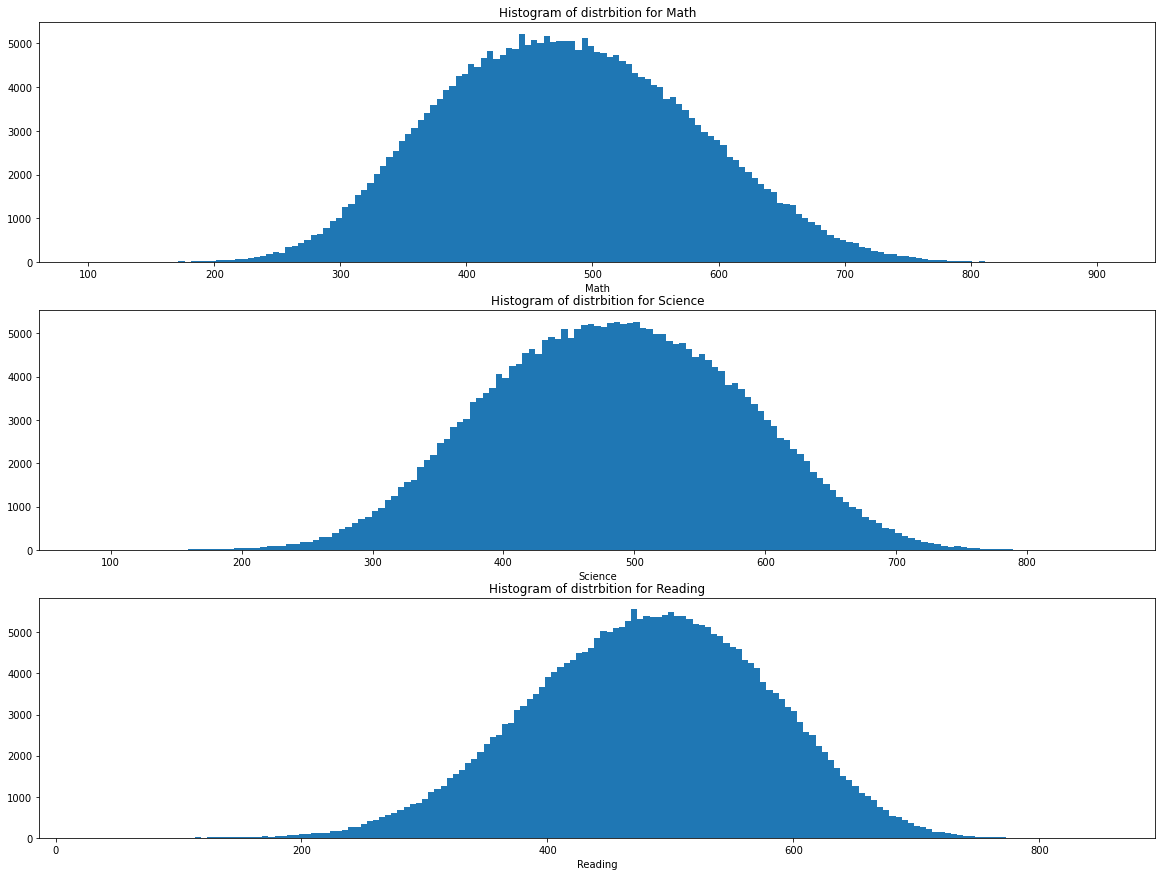

In [41]:

fig, ax = plt.subplots(nrows=3, figsize = [20,15])

variables = ['Math', 'Science','Reading']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(pisa_final[var]), max(pisa_final[var])+5, 5)
    ax[i].hist(data = pisa_final, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title('Histogram of distrbition for ' + '{}'.format(var))

plt.show();

The distribution of the results for the maths, science and reading is normally distributed, with no skewness and not fat taiils, which indicates the perfect distrbution for testing the prediction for future analysis. Most of the results are around 500 for math and science, and reading. 

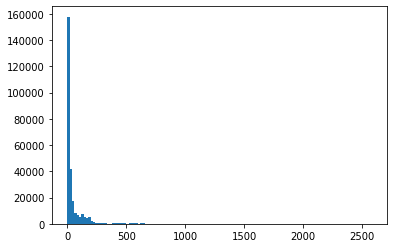

In [43]:
bins = np.arange(0, pisa_final['W_FSTUWT'].max()+1, 20)
plt.hist(data = pisa_final, x = 'W_FSTUWT', bins = bins);

In [44]:
pisa_final.W_FSTUWT[pisa_final.W_FSTUWT > 1000]

36736     1160.6271
37271     1188.7835
37272     1188.7835
122061    1033.8944
122062    1033.8944
            ...    
268805    1730.6708
268806    1434.0042
268807    1730.6708
268808    1730.6708
268809    1366.2905
Name: W_FSTUWT, Length: 351, dtype: float64

In [45]:
for i in range(len(pisa_final.index)):
    if(pisa_final.iloc[i,12]>1000):
        pisa_final.iloc[i,12] = pisa_final.iloc[i,12]/10

We have a count of 325 values over 1000, to make the dataset more accurate for comparison with math, science and reading. We supposed that values over 1000 are due to typos, we then divide them by ten to make them under the interval of [0;1000]

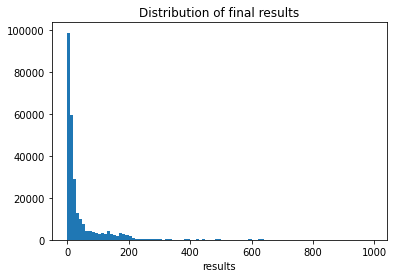

In [46]:
bins = np.arange(0, pisa_final['W_FSTUWT'].max()+1, 10)
plt.hist(data = pisa_final, x = 'W_FSTUWT', bins = bins)
plt.title('Distribution of final results')
plt.xlabel('results');

We can remark that the distribution is highly skewed to the left, with almost all the variables are between the 0 and 100. We can adjust the varbles by taking the log or the difference for transforming data to normal distribution. 

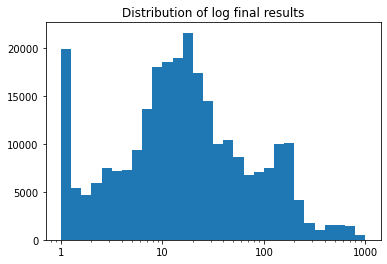

In [47]:
bins = 10 ** np.arange(0, 3.0+0.1, 0.1)
ticks = [1,10,100,1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = pisa_final, x = 'W_FSTUWT', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of log final results')
plt.show();

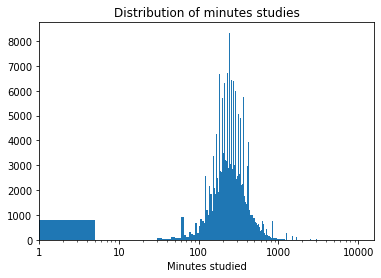

In [48]:
ticks = [1,10,100,1000,10000]
labels = ['{}'.format(val) for val in ticks]
bins = np.arange(0, pisa_final['TOT_min'].max()+1, 5)
plt.hist(data = pisa_final, x = 'TOT_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of minutes studies')
plt.xlabel('Minutes studied');

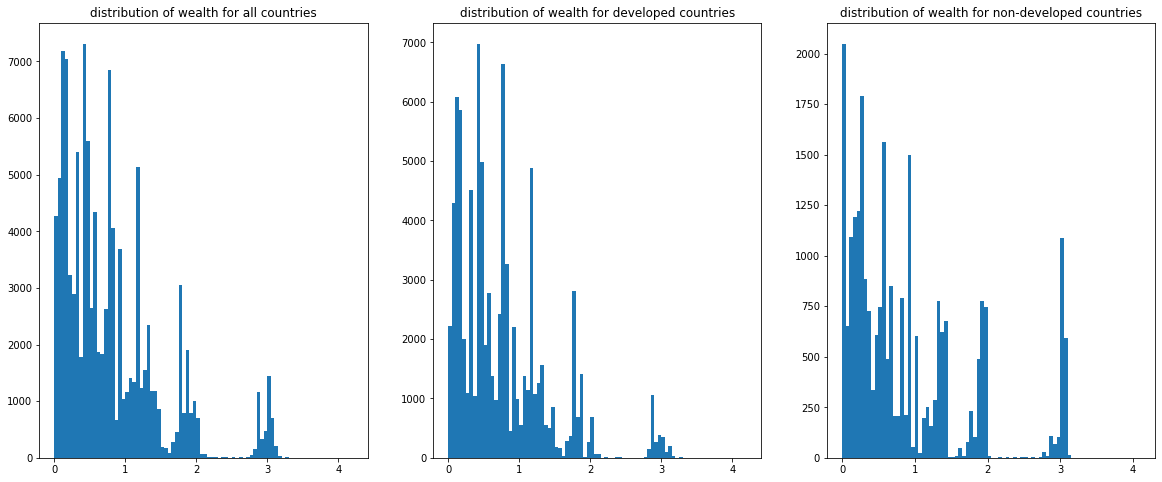

In [49]:
plt.figure(figsize = [20, 8]) 


plt.subplot(1, 3, 1) 
bins = np.arange(0, pisa_final['WEALTH'].max()+1, 0.05)
plt.hist(data = pisa_final, x = 'WEALTH', bins = bins)
plt.title('distribution of wealth for all countries')

plt.subplot(1, 3, 2) 
bins = np.arange(0, oe['WEALTH'].max()+1, 0.05)
plt.hist(data = oe, x = 'WEALTH', bins = bins)
plt.title('distribution of wealth for developed countries')

plt.subplot(1, 3, 3) 
bins = np.arange(0, nooe['WEALTH'].max()+1, 0.05)
plt.hist(data = nooe, x = 'WEALTH', bins = bins)
plt.title('distribution of wealth for non-developed countries');

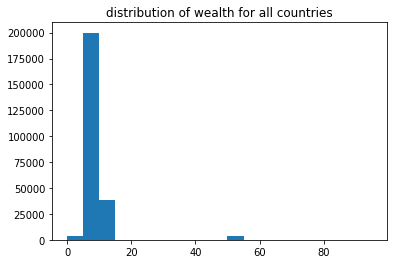

In [50]:
bins = np.arange(0, pisa_final['Effort'].max()+1, 5)
plt.hist(data = pisa_final, x = 'Effort', bins = bins)
plt.title('distribution of wealth for all countries');

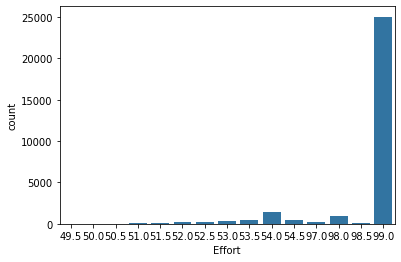

In [51]:
pisa_above = pisa_final[pisa_final.Effort>10]
sb.countplot(data = pisa_above, x = 'Effort', color=default_color);

In [52]:
for i in range(len(pisa_final.index)):
    if(pisa_final.iloc[i,17]>10):
        pisa_final.iloc[i,17] = pisa_final.iloc[i,17]/10
pisa_final['Effort'] = pisa_final['Effort'].round().astype(int)
ordinal_var = {'Effort': [1,2,3,4,5,6,7,8,9,10]}
for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var[var])
    pisa_final[var] = pisa_final[var].astype(ordered_var)

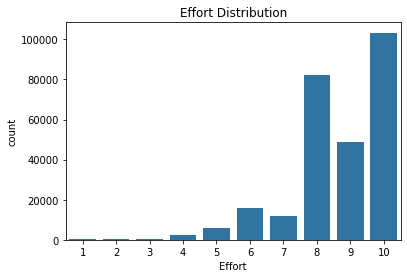

In [53]:
sb.countplot(data = pisa_final, x = 'Effort', color=default_color)
plt.title('Effort Distribution');

> Effort was into confustion because of the values above 10, which was higher the max effrt spent in the echelon made by the PISA. Then we have modified the graphics to make only from 1 to 10 values. 

The distribution of wealth between developed and non developed countries does not show a great fifference, between the two kinds of countirs. Instead, non developed countries have more high wealth families because of the integration of gulf countries like UAE.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of education results like math, science, and reading is well distributed, instead, the distribution of final results needs to be log tranformed for making results bettr informative. Welth is highly skewed to the left, which indicates the low proportion of extra wealth family which more logical. Intead, total minutes of studies in or extra classes need to be scaled to represent all the sample.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We have calculated the total minutes studied using the values of values of every subject studied alongside the extra classes minutes spend in studies. Effort must be modeified to an interval of 10 only with most of the values are between 0 and 10. only for 26000 variables, which indicate that values must be modeified to the interval of 10 and must be only integer.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [54]:
numeric_vars = [ 'AGE', 'WEALTH', 'W_FSTUWT', 'Science', 'Math', 'Reading', 'TOT_min']
categoric_vars = ['OECD','Gender', 'Late', 'skip', 'mother_degree', 'Mother_job', 'Father_degree', 'Father_job','at_home', 'Effort']

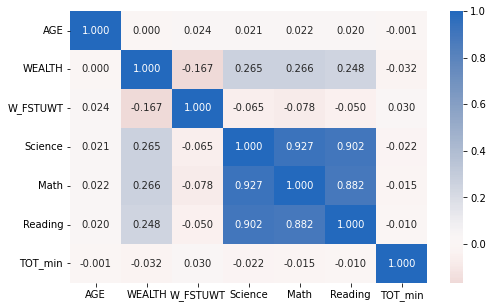

> The results tests whether the numeric values with high correlation. We can sethat exams results for Math science and reading are highly correlated. Instead the final result is negatively corraleted with the exams and not highly significant. In the other side, Age does not show a great dependence with the results shown in the correlation histogram. Wealth results depicts iportant features in term of the correlation with the different exams and negtively correlated with the final result. 

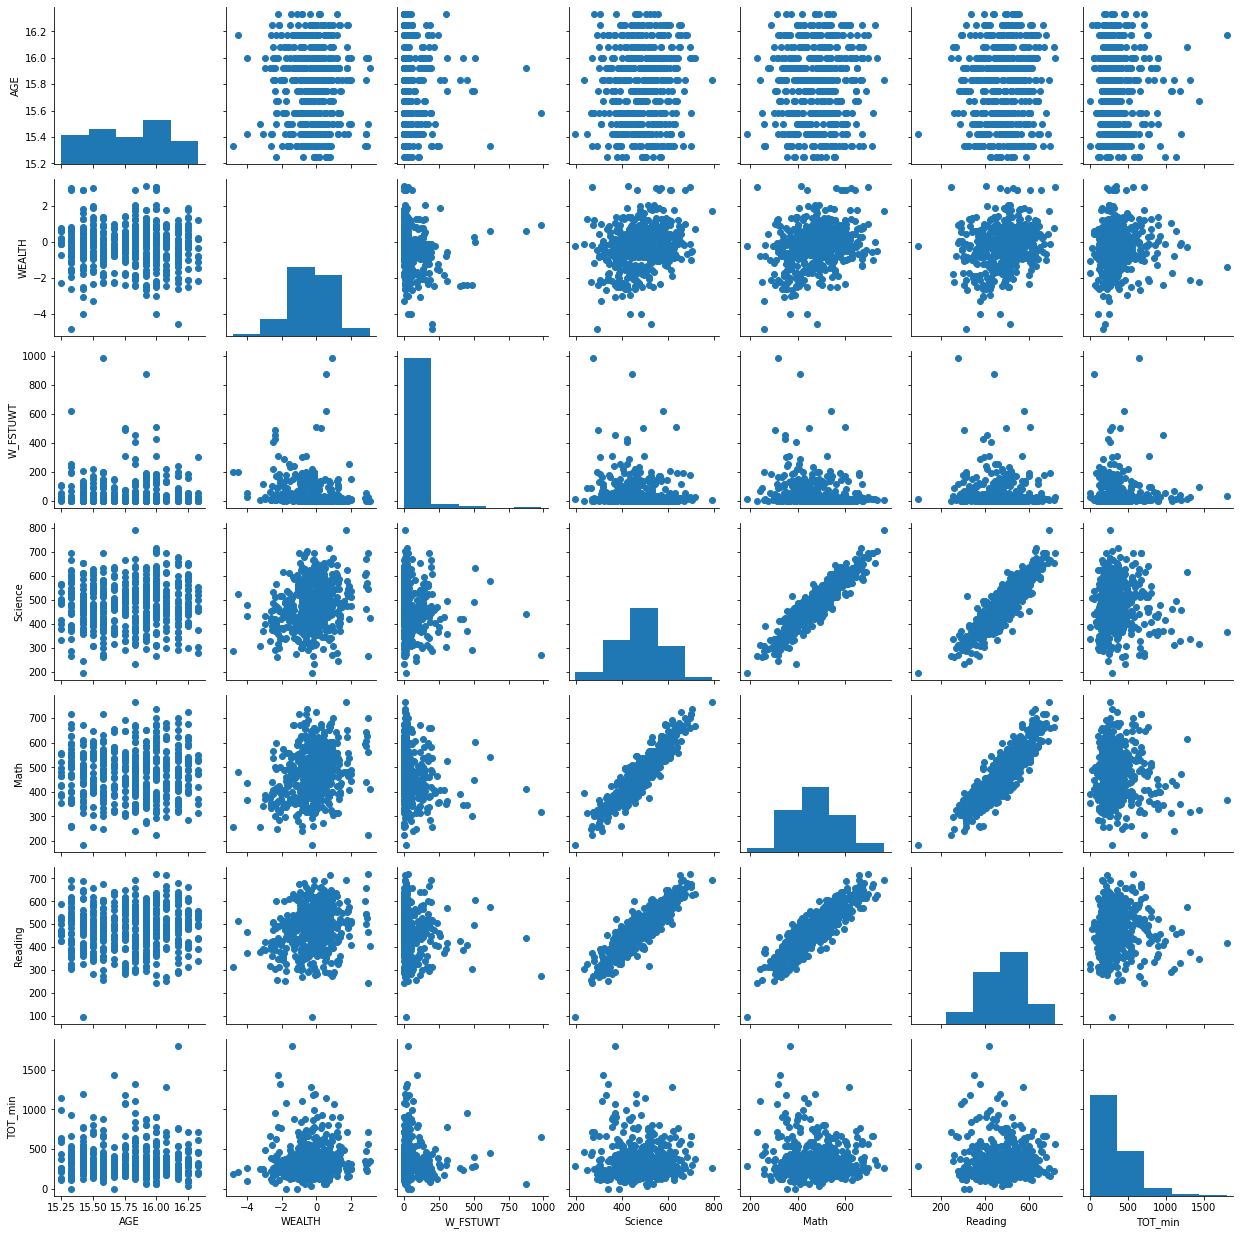

In [57]:
pisa_samp = pisa_final.sample(n=500)

g = sb.PairGrid(data = pisa_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 5);
g.map_offdiag(plt.scatter);

> The relationship between the exams'results is linear according to the graphics in the figure above. In the other hand the distibution of the ages for all kind of the exams is equal with only few outliers.

### Quantitavive vs. Categorical

<Figure size 1440x1440 with 0 Axes>

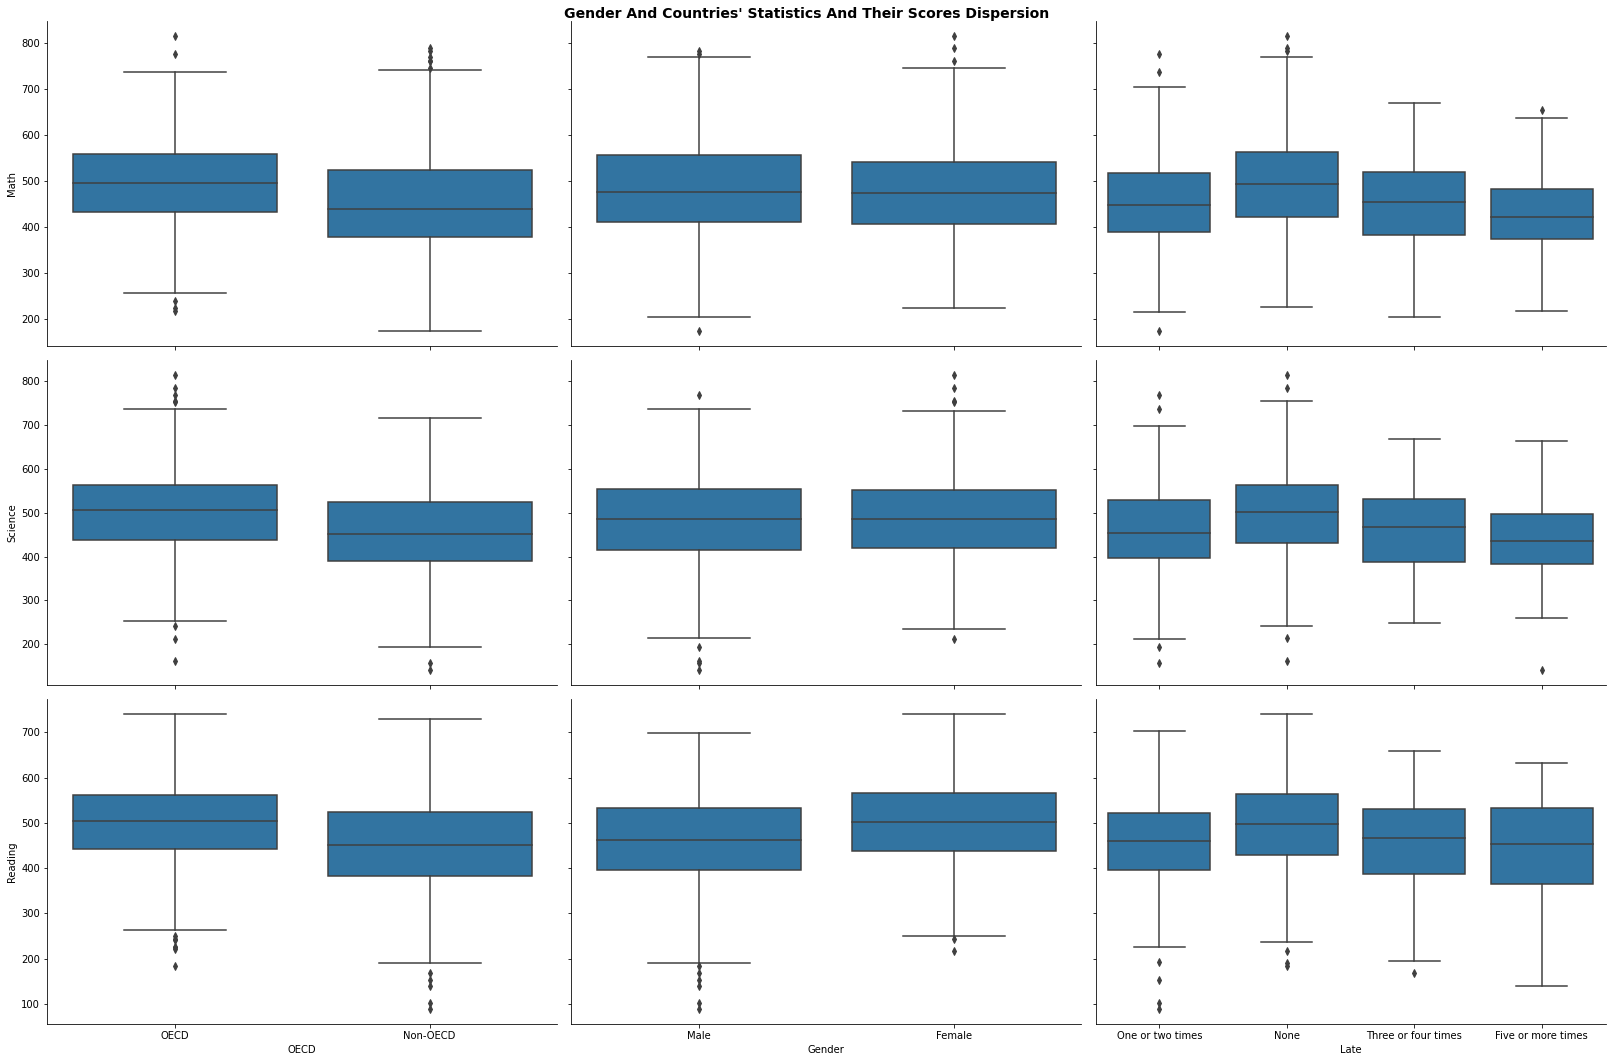

<Figure size 1440x1440 with 0 Axes>

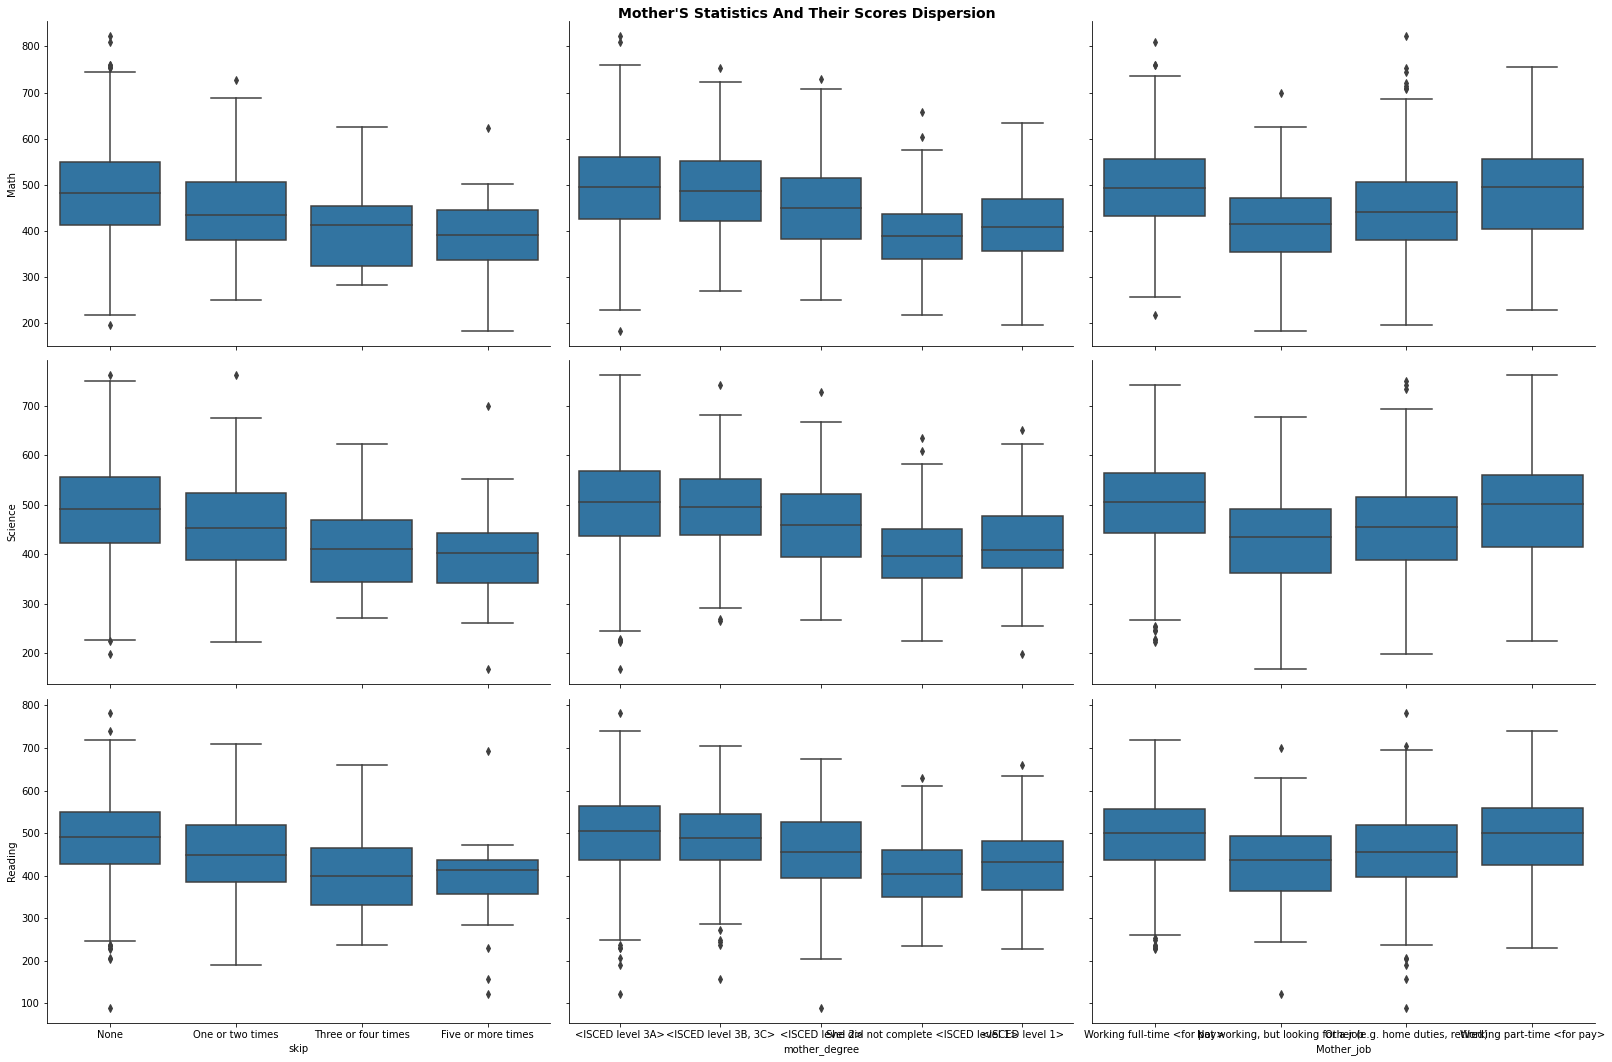

>The reults show that females have more good scores in reading the male, and the same reults for both science and math. In the other hand, the results for people who do not go late to shool are high for all the kind of subjects. Surprisingly, the results for reading are better for student who skip the school for five times or more. A more Educated mothers have a positive impact on the results of the pupul, it is logical that well educated mother could improve the education level of the students.Scores for scientific subjects is better in developed countries in comparsion with reading, even though it have shown better results for the developed countries. 

<Figure size 2160x1440 with 0 Axes>

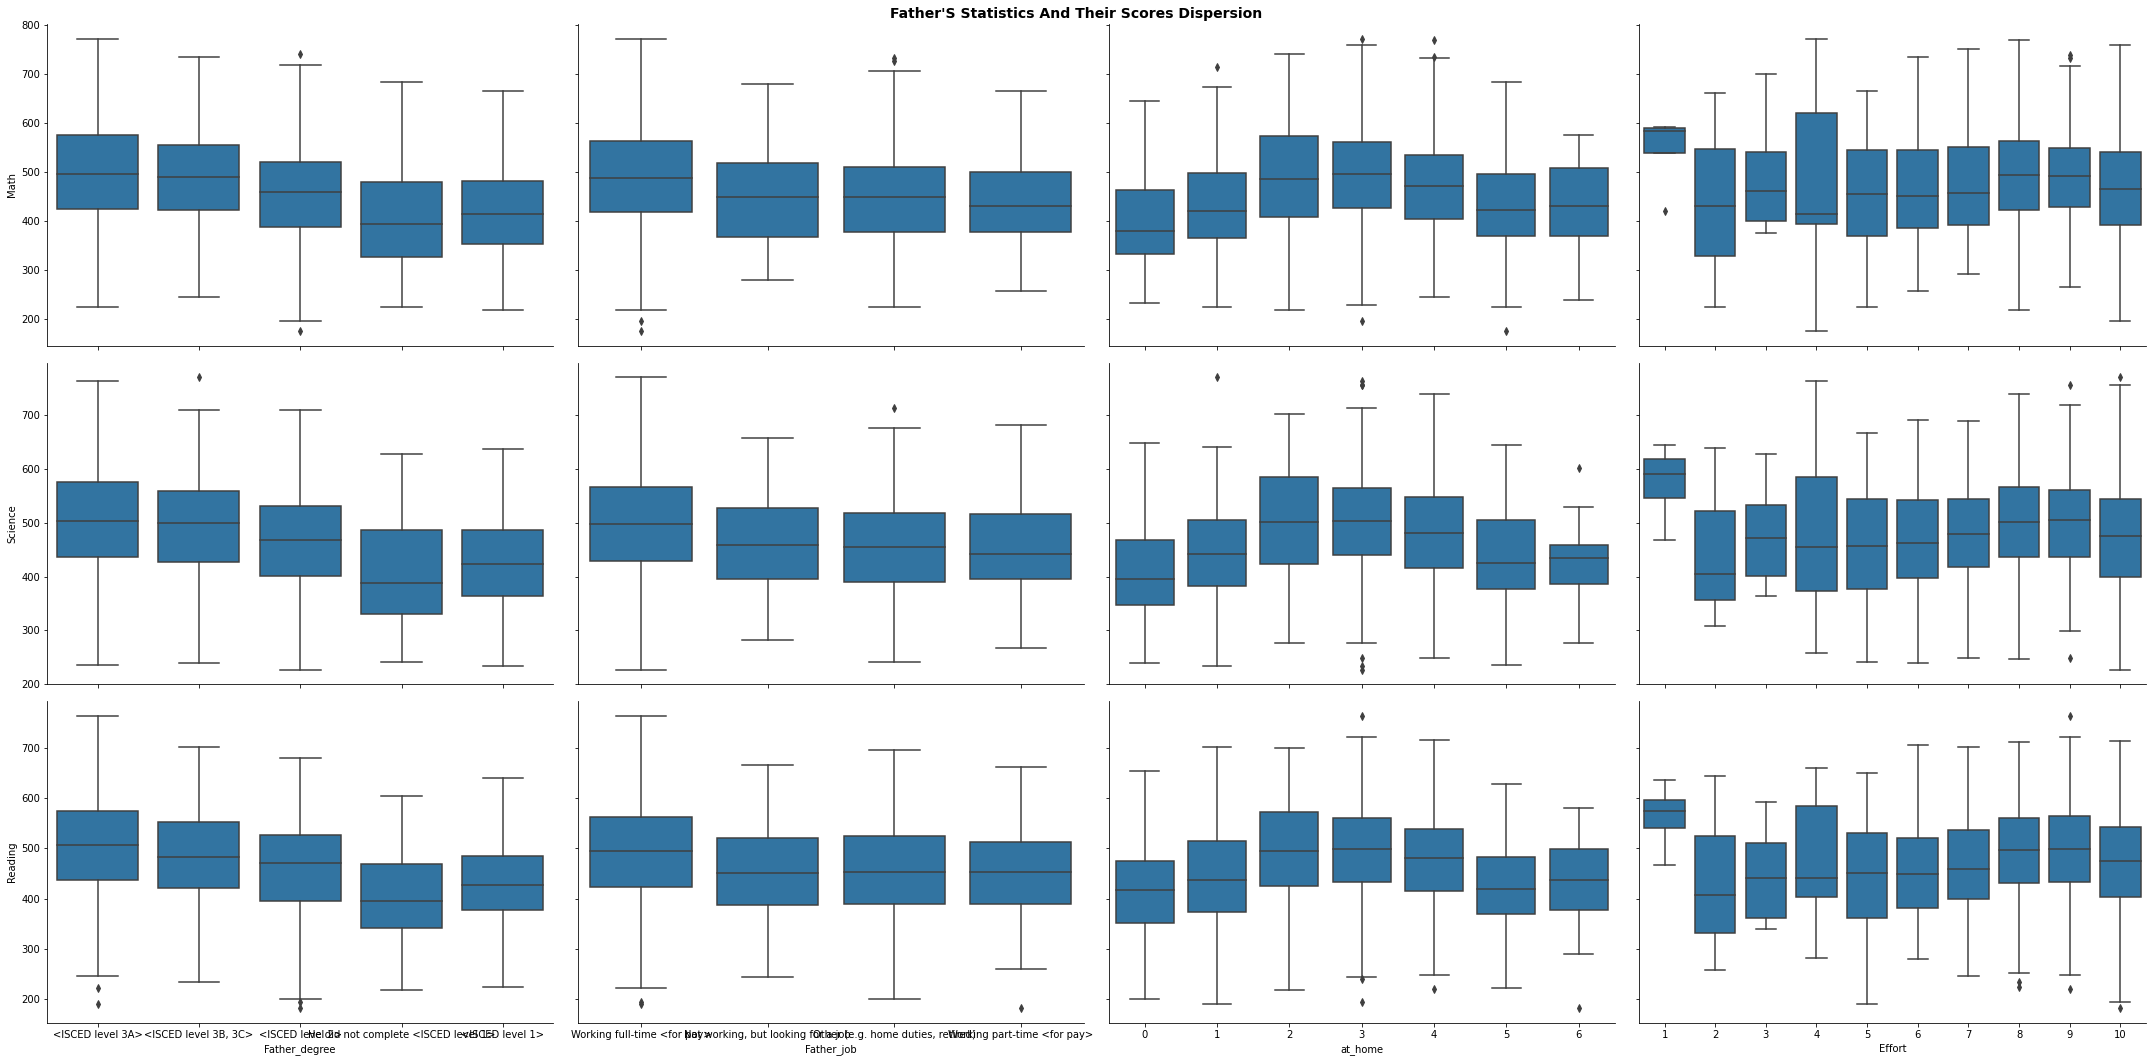

In [62]:
pisa_samp = pisa_final.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [30, 20])
g = sb.PairGrid(data = pisa_samp, y_vars = ['Math', 'Science', 'Reading'], x_vars = categoric_vars[6:len(categoric_vars)],
                height = 5, aspect = 1.5)
g.map(boxgrid)

plt.suptitle("Father's statistics and their scores dispersion".title(), fontsize = 14, weight = 'bold')
plt.tight_layout()
plt.show()

In the pursuit of the results of the mother, fathers degree have barely the same influence on the education level of the son. Mother with a job even a part time job improve the results for pupils in the differet subjects dramatically. In the other side, fathers have a full time job is the best for student to get better scores. And apart time job for fathers is the worst for the education level. Living in home with no siblings or in crowded house have less influence on the pupils results especially in readings and maths. For the efforts done to study, we can see that having a 3 degree of effrt is the best for all the rsults. 

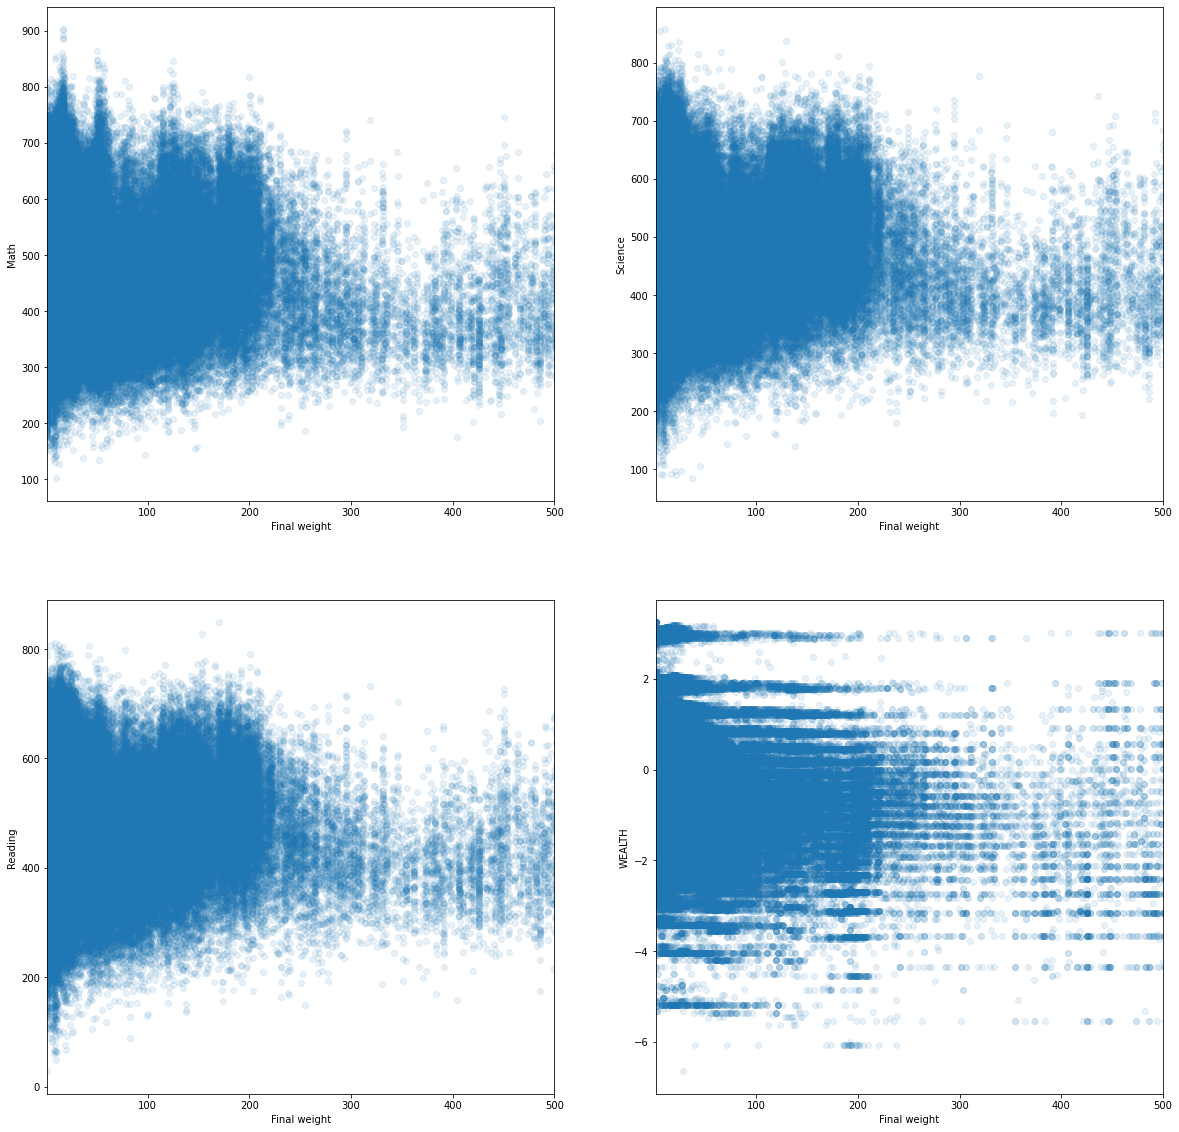

In [63]:
plt.figure(figsize = [20, 20])

plt.subplot(2, 2, 1)
plt.scatter(data = pisa_final, x = 'W_FSTUWT', y = 'Math', alpha = 1/10)
plt.xlim([1, 500])
plt.xlabel('Final weight')
plt.ylabel('Math')

plt.subplot(2, 2, 2)
plt.scatter(data = pisa_final, x = 'W_FSTUWT', y = 'Science', alpha = 1/10)
plt.xlim([1, 500])
plt.xlabel('Final weight')
plt.ylabel('Science')

plt.subplot(2, 2, 3)
plt.scatter(data = pisa_final, x = 'W_FSTUWT', y = 'Reading', alpha = 1/10)
plt.xlim([1, 500])
plt.xlabel('Final weight')
plt.ylabel('Reading')

plt.subplot(2, 2, 4)
plt.scatter(data = pisa_final, x = 'W_FSTUWT', y = 'WEALTH', alpha = 1/10)
plt.xlim([1, 500])
plt.xlabel('Final weight')
plt.ylabel('WEALTH')


plt.show();

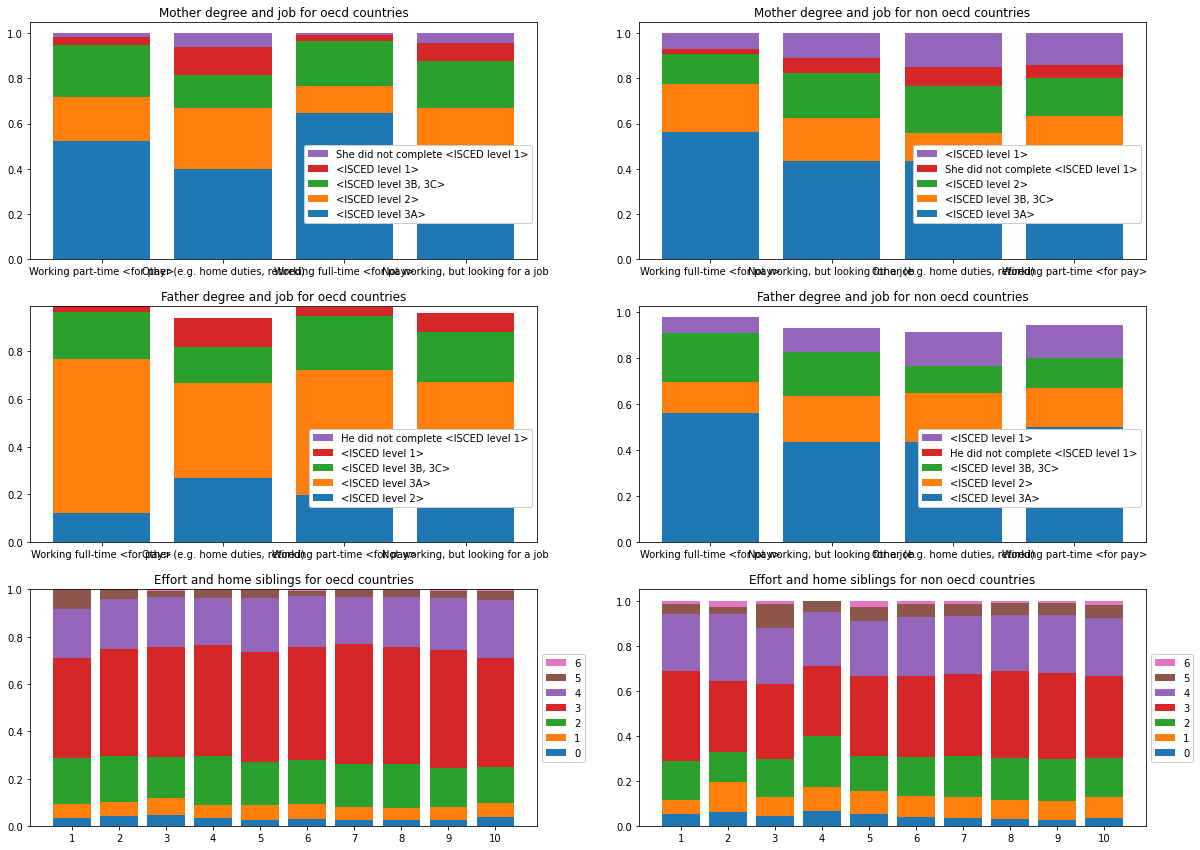

> The distribution of working mother and fathers differs in term of qualifications needed and countries belonging to. For mothers in the oecd countries, most of the working women have a high qualification in term of part and full time. For non-OECD countries, the stacked barplt depicts the women having a job does not have high qualification idenftical to the OECD women. And women which are jobless or otherwise, are composed of less qualified women in comparions to the non OECD countries. For fathers, the results show that men with full time job have lower qualification than women in the same kind of countries (OECD). In contrast, fathers for non-OECD fathers are more qualified to be in the working force. Fo the confort made for children to study, we can find that in the OECD countries, pupils spend less effort when they live with equilibrite famile of 3 to 4 siblings in maximum.  

### The role of Gold

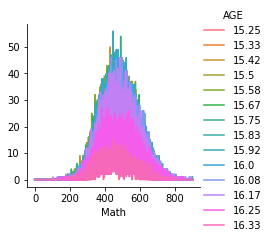

In [65]:

def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, pisa_final['Math'].max()+1/3, 1/3)

g = sb.FacetGrid(data = pisa_final, hue = 'AGE')
g.map(freq_poly, "Math", bins = bin_edges)
g.add_legend();

The aged used in the distribution are mostly between 15.58 and 16, with  low portion for the ages above 16 and below 15.25.

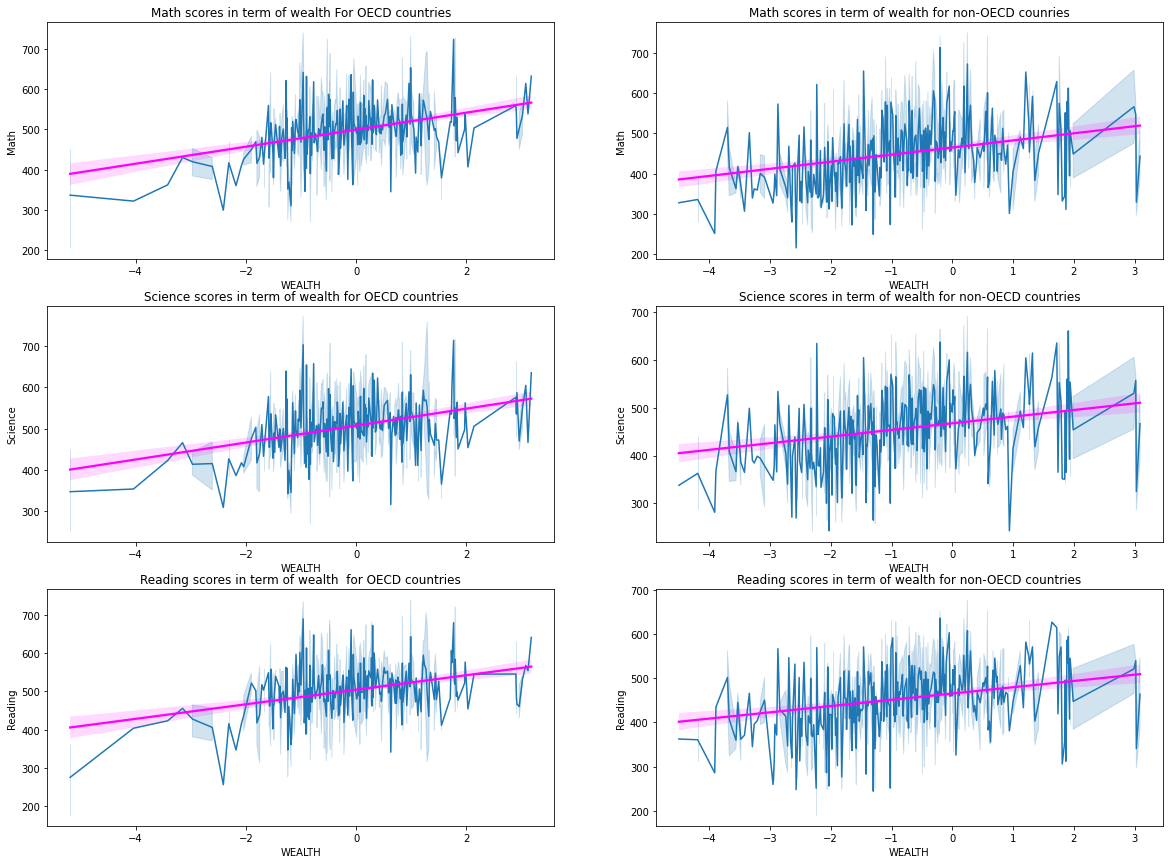

> Subjects results like Maths, science and reading are not infuenced by the degree of weight for all the elements got for the students or the features. We ca see that wealth play a key role in getting better results and it is positevely linear correlated for better high values in each subject. For the OECD countries, the allur of the line is sharper, beacuse the higher the wealth, the better the level of education which is caused by capitalism. In the other hand, the allure of the line is less sharper for the non-OECD countries, which indicates more independence between the wealth and the level in studies. Math and science for the OECd countries depicts more dependence on the wealth for higher reults.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The level of education and stability at home is important to get more results n terms of science and literature. Morevover, the tendency of women in particular to be more independent interm of work and self reliance is important for the results of children. Moreover, weath is positevly correlaed with the results and it even have a linear regrssion relationsip for better results in the math, science and reading subjects.  
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Age does not play a great importance in getteing more well educated efforts, instead the qualification and working force power for parents are highly related. Further more, our results depicts that efforts could be related in part of it for the comfort zone only, in which the parents could provide a better climat for studies.

## Multivariate Exploration

> In this section we explore the multi dimentional relationship between the diffrent quanitative variable under diffrent assumptions using the categorical data.

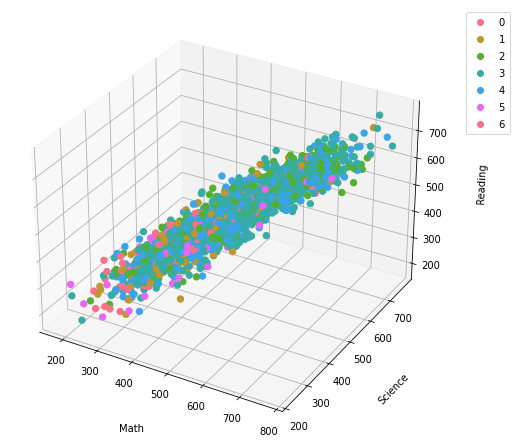

> Most of the distribution is related to the three types of subjects, where an improvement in of them leads to more and high degree in the other two. We can see that some students could be good in math, but they have low degree in science and reading. Otherwise, most of the high resultys in term of ecience and maths have better conditions in term of the number of family member they live with. The 3D plot finds that the worst grades in maths have math have the same conditions in term of family stability with the highest values. 

In [68]:
pisa_samp = pisa_final.sample(n = 1000, replace=False)

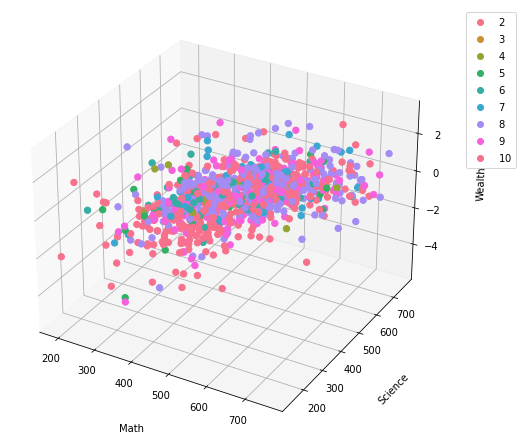

In [69]:
x = pisa_samp['Math']
y = pisa_samp['Science']
z = pisa_samp['WEALTH']
c = pisa_samp['Effort']

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=c, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Math', labelpad=20)
ax.set_ylabel('Science', labelpad=20)
ax.set_zlabel('Wealth', labelpad=20)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);

> Science and Mathe results are dependent from the level of wealth family holds. As long as the families are wealthier, as long as they get better degrees in math and science. Other wise, the effor is ttally higher for the less wealthy family, we can see that the higher results on the 3d plot is related to the highest results. 

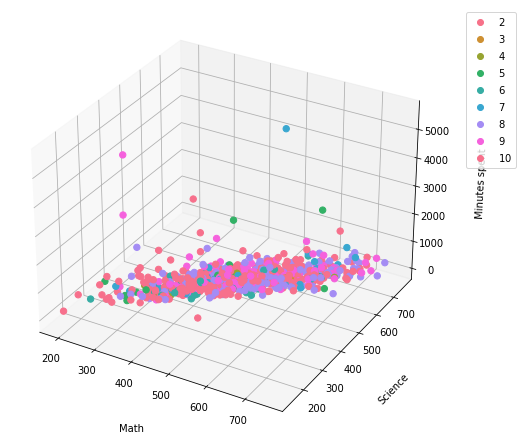

In [70]:
x = pisa_samp['Math']
y = pisa_samp['Science']
z = pisa_samp['TOT_min']
c = pisa_samp['Effort']

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=c, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Math', labelpad=20)
ax.set_ylabel('Science', labelpad=20)
ax.set_zlabel('Minutes spent', labelpad=20)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);

The total minutes spent to study does not have an influence on the results of math and science. Instead, it is clearer that the lower of minutes of studies spent between classes and extra hours, the bettyer the results. 

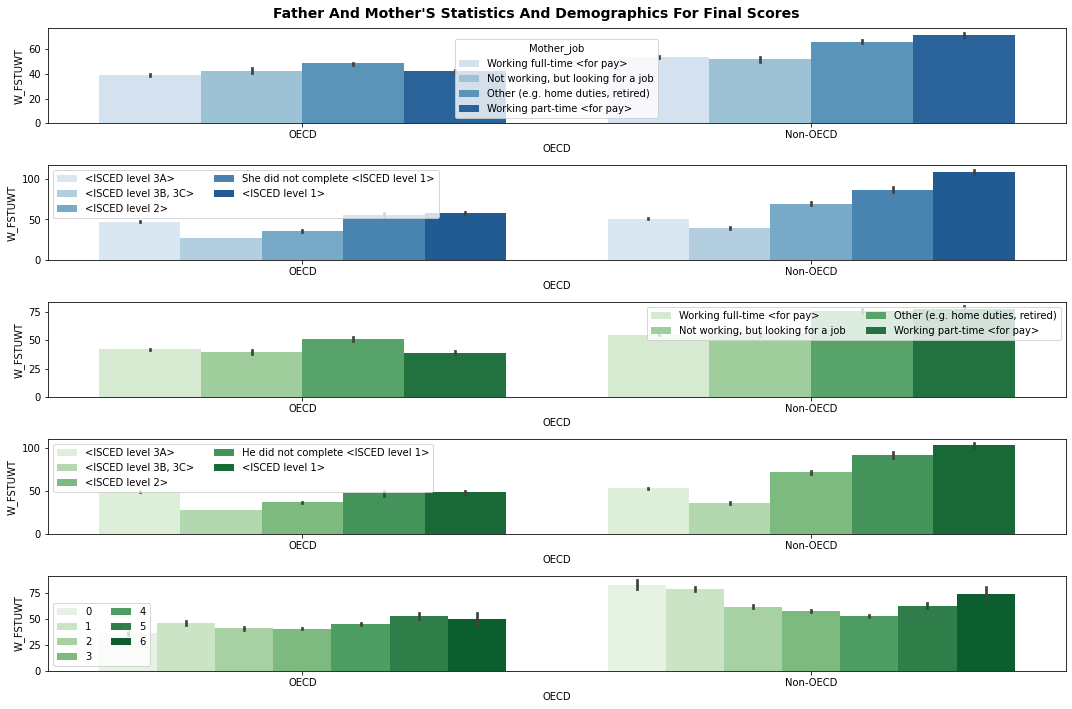

> The plots of multipbe bars show important results in term of the difference between the developed and non developed countries. The final students weight shows that haveing a full-time or part time job for father and mother is good for e better weight in the devloped countries. Instead, a part time job for the non-developed countries holds negative effect on the weight alongside being not working. For the home condistions, wieght is relative to the number of siblings living with, but it is more important for developed countries, where the perefect number of siblings is 3 to 4 for non-OECD and 0 to 3 siblings for OECD countries. In term of the education for parents, we can see that the impact is higher on non-OECD countries with higher weight on the children for non educated parent. 

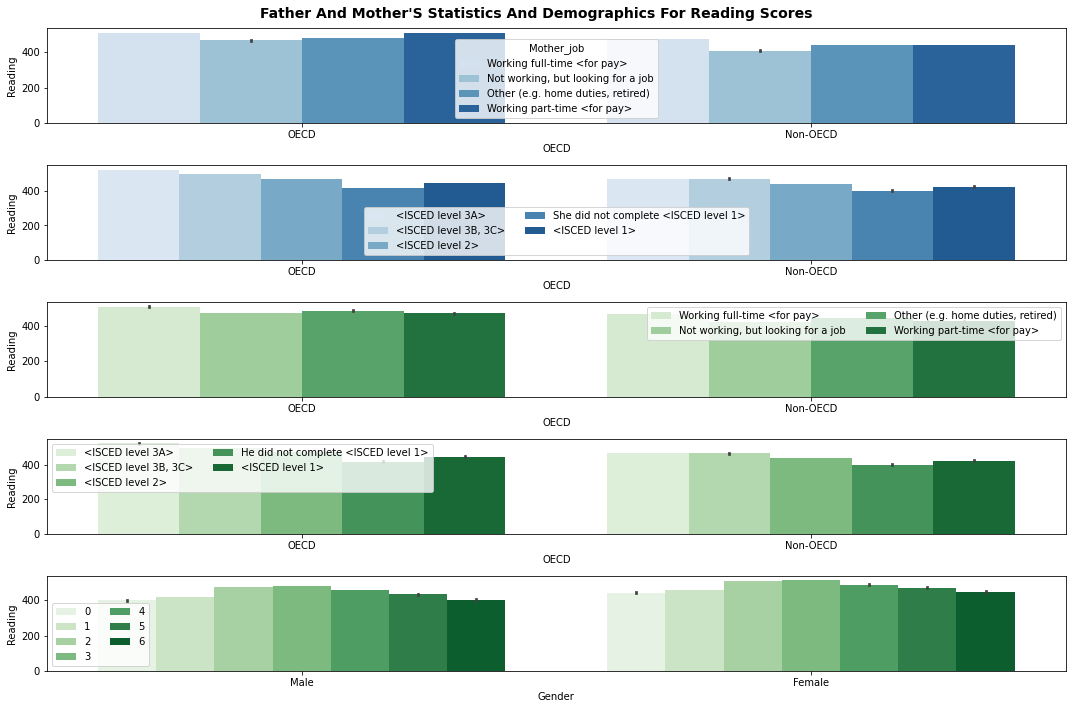

In [73]:
plt.figure(figsize = [15, 10])


plt.subplot(5, 1, 1)
sb.barplot(y='Reading', x= 'OECD', hue='Mother_job', data=pisa_final, palette='Blues')

plt.subplot(5, 1, 2)
ax = sb.barplot(y='Reading', x= 'OECD', hue='mother_degree', data=pisa_final, palette='Blues')
ax.legend(ncol = 2)

ax = plt.subplot(5, 1, 3)
sb.barplot(y='Reading', x= 'OECD', hue='Father_job', data=pisa_final, palette='Greens')
ax.legend(loc = 1, ncol = 2) 

ax = plt.subplot(5, 1, 4)
sb.barplot(y='Reading', x= 'OECD', hue='Father_degree', data=pisa_final, palette='Greens')
ax.legend(loc = 2, ncol = 2)

ax = plt.subplot(5, 1, 5)
sb.barplot(y='Reading', x= 'Gender', hue='at_home', data=pisa_final, palette='Greens')
ax.legend(loc = 3, ncol = 2)

plt.suptitle("Father and mother's statistics and Demographics for reading scores".title(), fontsize = 14, weight = 'bold')
plt.tight_layout()
plt.show();

> Reading as the rest of the subjects studied is related to the level of qualification for the father and mother. But surprisingly, it shows that ârents which keep at home, are better in pushing shildren for reading. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Wealth is important for both kinds of countries to elevate the scores of lly math and science. Moreover, pupil who are good in one subject will be good in all the other subjects. An independent and high qualified parents lead to better degrees for both gender. Furthermore, have better conditions of studies at home, where te house must be not crowded lead to higher results.

### Were there any interesting or surprising interactions between features?

> Age and effert does not have great impact in improving the scores for the pupils.

## Conclusions
> Qualitative studies are always limited to the conditions and time zone in which they were generated. Our results could show that wealth could play an imprtant role alongside the home conditions. But in rality, we could see that even homeless and extreme condistions could lead to high results


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [1]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1595691 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\easygoing\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\easygoing\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\easygoing\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\easygoing\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\easygoing\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_sing